<h1><center><b>Traffic Sign Board Prediction </b></center></h1>

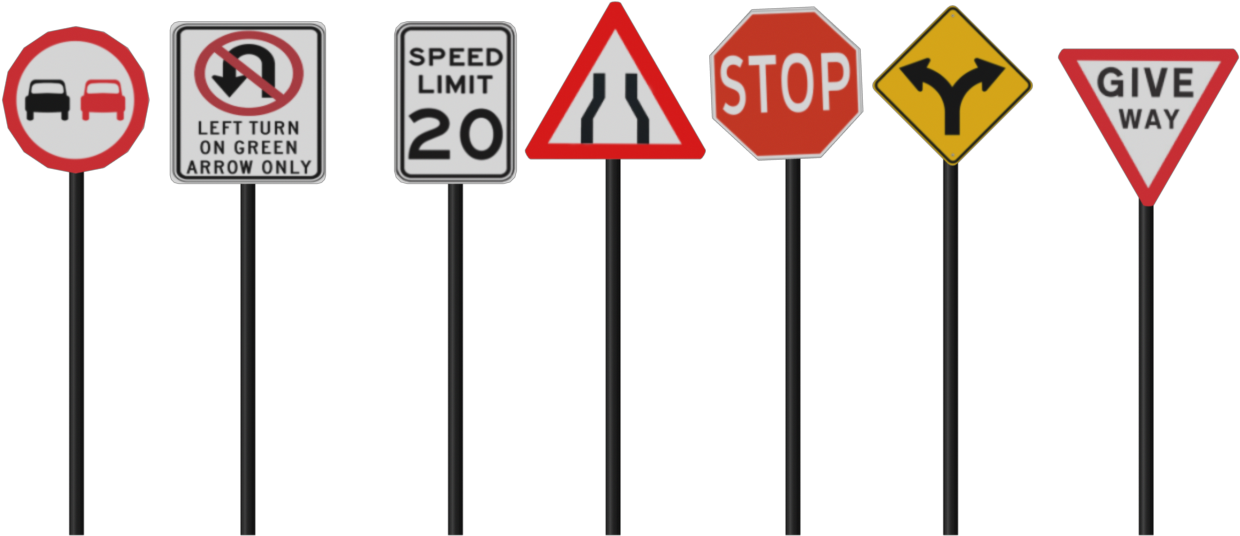


## Building a GUI which will detect the traffic board using deep learning

In this project we will be build a deep learning model which will predict the traffic sign board into different categories.

We followed the below steps for this project:
1. Importing the libraries and data.
2. Overlook into data.
3. Building a CNN model and finding the accuracy.
4. Accuracy and loss plots over train and test data
5. Saving the model.

## Step 1 : Importing the libraries and data

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

In [2]:
#Changing the directory for getting the dataset
os.getcwd()
os.chdir('C:\\Users\\suren\\Downloads\\Traffic signs')
os.getcwd()

'C:\\Users\\suren\\Downloads\\Traffic signs'

In [3]:
#Loading the data
Images_data = [] #Loading Images to Images_data List
Images_labels = [] #Loading labels to Images_labels List
classes = 43 #Classes

for i in range(classes): #Looping all the classes 
    path = os.path.join('C:\\Users\\suren\\Downloads\\Project','Train',str(i))
    images = os.listdir(path)
    
    for a in images:#Looping through all the images
        image = Image.open(path + '\\' + a) 
        image = image.resize((32,32)) #Resizing the images
        image = np.array(image)
        Images_data.append(image) #Appending all the images to Images_data list
        Images_labels.append(i) #Appending all the labels to Image_labels list

Images_data = np.array(Images_data) #list to arrays
Images_labels = np.array(Images_labels) #list to arrays

## Step 2 : Overlook into data

In [4]:
#printing the size of data and labels
print('Size of Images : ' ,Images_data.shape)
print('SIze of Labels : ' ,Images_labels.shape)

Size of Images :  (39212, 32, 32, 3)
SIze of Labels :  (39212,)


(39212, 32, 32, 3 ) - tells us there are 39212 images and of size 32*32 pixels and last 3 indicates colored images.

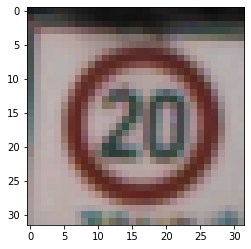

In [5]:
#display the first image in the training data
plt.imshow(Images_data[105,:,:],cmap='gray')
plt.show()

In [6]:
#Splitting the data into train and test
train_images,test_images,train_labels,test_labels = train_test_split(Images_data,Images_labels,test_size=0.2,random_state = 42)

In [7]:
#printing the size of train and test data
print('train_images size : ' ,train_images.shape)
print('train_labels size : ' ,train_labels.shape)
print('test_images size :  ' ,test_images.shape)
print('test_labels size :  ' ,test_labels.shape)

train_images size :  (31369, 32, 32, 3)
train_labels size :  (31369,)
test_images size :   (7843, 32, 32, 3)
test_labels size :   (7843,)


In [8]:
#change the labels from integer to one-hot encoding
train_labels = to_categorical(train_labels,43)
test_labels = to_categorical(test_labels,43)

## Step 3 : Building the model and finding the accuracy

In [9]:
#Building the model
model = Sequential()
#hidden layer using activation relu
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=train_images.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2))) #Adding extra hidden layers
model.add(Dropout(rate=0.25)) #Dropout frequency
#Flattening the model
model.add(Flatten())
model.add(Dense(256, activation='relu')) #more layers
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax')) #out layer

In [10]:
#Compilation 
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#Fitting or passing the data to the model
history = model.fit(train_images, train_labels, batch_size=256, epochs=5, verbose=1,validation_data=(test_images, test_labels))

Epoch 1/5
123/123 [==============================] - 10s 80ms/step - loss: 10.2360 - accuracy: 0.1375 - val_loss: 1.9555 - val_accuracy: 0.5004
Epoch 2/5
123/123 [==============================] - 10s 79ms/step - loss: 1.8655 - accuracy: 0.5252 - val_loss: 0.8483 - val_accuracy: 0.7734
Epoch 3/5
123/123 [==============================] - 10s 79ms/step - loss: 1.0778 - accuracy: 0.7215 - val_loss: 0.4620 - val_accuracy: 0.8854
Epoch 4/5
123/123 [==============================] - 10s 84ms/step - loss: 0.7961 - accuracy: 0.8003 - val_loss: 0.2641 - val_accuracy: 0.9305
Epoch 5/5
123/123 [==============================] - 11s 87ms/step - loss: 0.6582 - accuracy: 0.8430 - val_loss: 0.2358 - val_accuracy: 0.9402


In [11]:
#Evaluating the model
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc)) #Printing the accuracy

246/246 [==============================] - 1s 3ms/step - loss: 0.2358 - accuracy: 0.9402
Evaluation result on Test Data : Loss = 0.23583899438381195, accuracy = 0.940201461315155


#### Observations:
1. Accuracy of the model = 94%
2. Loss of the model = 23%

Model is working good, however will add more hidden layers for better accuracy and less loss.

In [12]:
#Adding more dense layers
model = Sequential()
#hidden layer using activation relu
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=train_images.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) #adding more layers
model.add(MaxPooling2D(pool_size=(2, 2))) #adding more layers
model.add(Dropout(rate=0.25))
#Adding more Conv2D, Maxpooling, Dense layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) #adding more layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) #adding more layers
model.add(MaxPooling2D(pool_size=(2, 2))) #adding more layers
model.add(Dropout(rate=0.25))
#Flattening the model
model.add(Flatten())
model.add(Dense(256, activation='relu')) #adding more layers
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax')) #out layer

In [13]:
#Compilation 
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#Fitting or passing the data to the model
history = model.fit(train_images, train_labels, batch_size=256, epochs=5, verbose=1,validation_data=(test_images, test_labels))

Epoch 1/5
123/123 [==============================] - 54s 437ms/step - loss: 2.8527 - accuracy: 0.4158 - val_loss: 0.8366 - val_accuracy: 0.8034
Epoch 2/5
123/123 [==============================] - 49s 398ms/step - loss: 0.6797 - accuracy: 0.8219 - val_loss: 0.1582 - val_accuracy: 0.9646
Epoch 3/5
123/123 [==============================] - 54s 436ms/step - loss: 0.3415 - accuracy: 0.9149 - val_loss: 0.0914 - val_accuracy: 0.9836
Epoch 4/5
123/123 [==============================] - 56s 454ms/step - loss: 0.2296 - accuracy: 0.9413 - val_loss: 0.0534 - val_accuracy: 0.9901
Epoch 5/5
123/123 [==============================] - 57s 459ms/step - loss: 0.1834 - accuracy: 0.9568 - val_loss: 0.0580 - val_accuracy: 0.9884


In [14]:
#Evaluating the model
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc)) #Printing the accuracy

246/246 [==============================] - 3s 14ms/step - loss: 0.0580 - accuracy: 0.9884
Evaluation result on Test Data : Loss = 0.05801389366388321, accuracy = 0.9883973002433777


#### Observations:
1. Accuracy of the model = 98.9%
2. Loss of the model = 5%

Model performed very well, since accuracy was increased

In [15]:
#Listing all the data in history (Call Backs)
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Step 4 : Accuracy and loss plots over train and test data

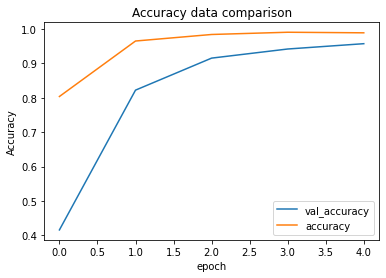

In [16]:
# Plotting the Accuracy for both training data and validation data using the history object.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['val_accuracy', 'accuracy'], loc='lower right')
plt.title('Accuracy data comparison')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

#### Observations:
Accuracy of the model is around 99%

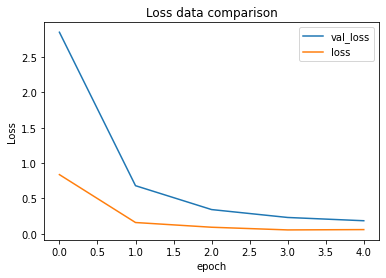

In [17]:
# Plotting the loss for both training data and validation data using the history object.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss data comparison')
plt.legend(['val_loss', 'loss'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

#### Observations:
Loss of the data is less than 5% after adding more hidden layers

## Step 5 : Saving the model

In [18]:
model.save('traffic_sign_board_detector.h5')
print(model.summary()) #summary of the model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)         

### Building a GUI by using above sequential model

In [19]:
#Importing the libraries for building GUI
import tkinter as tk
from tkinter import *
from PIL import ImageTk, Image
from keras.models import load_model

In [20]:
#Reloading the model
model = load_model('traffic_sign_board_detector.h5')

In [21]:
#By using the CSV file done labelling for all traffic signs
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing vehicle > 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

### Creating tkinter
1. Design
2. Prediction function
3. Display prediction
4. Upload an Image

#### 1. Design

In [22]:
#https://realpython.com/python-gui-tkinter/

window=tk.Tk()
window.geometry('800x600')
window.title('Traffic sign board detector')
window.configure(background='#466df0')
label=Label(window,background='#466df0', font=('arial',15,'bold'))
sign_image = Label(window)

#### 2. Prediction function

In [23]:
#prediction_function : By using this function we can pass the uploaded image to model and model will predict the image.

def prediction(file_path):
    global label_packed
    sign_board = Image.open(file_path) #Opening the random image from test data
    sign_board = sign_board.resize((30,30)) #Reshaping the size of image
    sign_board = numpy.expand_dims(sign_board, axis=0) #Expanding the dimensions
    sign_board = numpy.array(sign_board)
    pred = model.predict_classes([sign_board])[0] #Predecting the traffic sign using the model built above
    sign = classes[pred+1]
    print(sign) #Printing the traffic sign what model has predected
    label.configure(foreground='yellow', text=sign) #adding some color configuration  
 

#### 3. Display prediction

In [24]:
#display_prediction : By using this function we will display the prediction button after uploding the image

def display_prediction(file_path):
    classification=Button(window,text="Predict", command=lambda: prediction(file_path),padx=10,pady=5) #predicting the imag
    classification.configure(background='#466df0',foreground='yellow',font=('arial',10,'bold'))
    classification.place(relx=0.79,rely=0.46)


#### 4. Upload Button

In [25]:
#Upload_Button : By using this function will request for uploading an image

def upload_sign_board():
    try:
        file_path=filedialog.askopenfilename()   #Opening the file location where images are stored
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((window.winfo_width()/2.25),(window.winfo_height()/2.25)))
        uploaded=uploaded.resize((180,180))    #Resizing the images which are uploaded
        ima=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=ima)
        sign_image.image=ima
        label.configure(text='')
        display_prediction(file_path)     #Displaying the prediction
    except:
        pass

In [26]:
#Uplolading the image and classifying the type of image
upload=Button(window,text="Upload an image",command=upload_sign_board,padx=10,pady=5)  #Button configuration
upload.configure(background='#466df0', foreground='yellow',font=('calibri',10,'bold')) 
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True) #Button location
label.pack(side=BOTTOM,expand=True)
heading = Label(window, text="Predict the traffic sign",pady=20, font=('calibri',20,'bold'))
heading.configure(background='#466df0', foreground='white')
heading.pack()
window.mainloop()


## Conclusion :

#### 1. By using this model we got an accuracy around 99% and we are predicting the image which are uploaded.
#### 2. We will work on remaining part where video will be processed as input and model will be applied to that.